<a href="https://colab.research.google.com/github/sohyeon1202/ai_python/blob/main/240524_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 -1.5IQR ~ Q3 + 1.5IQR = 이상치 탐색

IQR(Interquartile Range, 사분위 범위)은 데이터의 중앙 50%를 나타내는 통계적 척도로, 데이터 세트의 흩어짐 정도를 설명하는 데 사용됩니다. IQR은 데이터의 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위를 의미합니다. 이를 계산하는 방법은 다음과 같습니다:

데이터 세트를 오름차순으로 정렬합니다.
데이터 세트를 4등분하여 각각의 사분위수를 구합니다.
Q1: 데이터의 하위 25% 지점 (첫 번째 사분위수)
Q3: 데이터의 상위 25% 지점 (세 번째 사분위수)

IQR을 계산합니다:
IQR = Q3 - Q1



In [4]:
import pandas as pd
df=pd.read_csv('iris.csv')
df.info()

df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#중복 데이터 확인
import pandas as pd
df=pd.read_csv('iris.csv')
df[df.duplicated()]

#중복 데이터 제거
df2=df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [26]:
#펭귄 데이터 결측치 확인
df=pd.read_csv('penguins.csv')
df.isnull().sum()
df.isna().sum()

#결측치 채우기
df.fillna(0, inplace=True)
print(df)

#결측치 변경
df.replace(np.nan,0)


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             0.0            0.0                0.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             0.0            0.0                0.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
#펭귄 중복 데이터 확인
import pandas as pd
df=pd.read_csv('penguins.csv')
df[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [10]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#sorting
iris_data = pd.read_csv('iris.csv')
iris_data.sort_values(by=['petal_length',], ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,setosa
35,5.0,3.2,1.2,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa


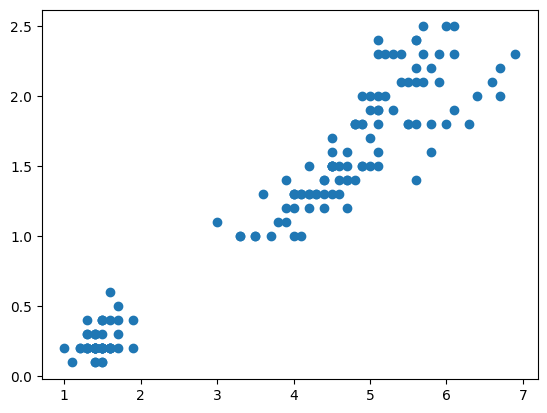

In [16]:
#시각화
import matplotlib.pyplot as plt
plt.scatter(x = iris_data['petal_length'], y = iris_data['petal_width'])
plt.show()

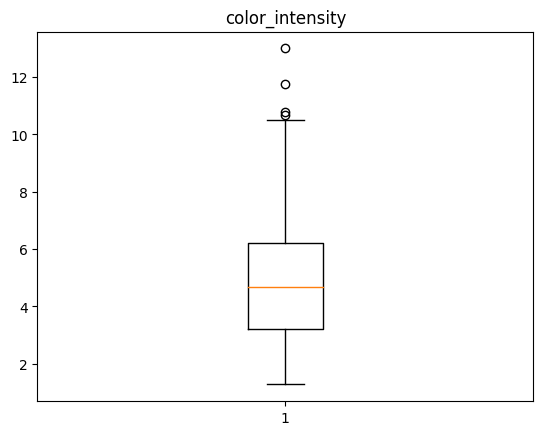

In [17]:
#이상치 확인 및 정제 boxplot, IQR공식
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1:'class_1',2:'class_2'})
import matplotlib.pyplot as plt
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [37]:
#이상치 제거
drop_outliers = wine.drop(index=outliers.index)
print('outliers :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

#이상치 대체
wine.loc[outliers.index, 'color_intensity'] = wine['color_intensity'].dropna().mean()
wine.loc[outliers.index, 'color_intensity']

outliers : (178, 14)
Drop outliers : (174, 14)


151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64

In [19]:
#이상치 데이터의 위치와 값 확인하기
import numpy as np
quartile_1, quartile_3 = np.percentile(wine['color_intensity'], [25,75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + 1.5*iqr
lower_whis = quartile_1 - 1.5*iqr
outliers = wine['color_intensity'][(wine['color_intensity'] >
upper_whis)|(wine['color_intensity'] < lower_whis)]
print(outliers)
print(outliers.index)

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64
Index([151, 158, 159, 166], dtype='int64')


In [20]:
#이상치 제거
drop_outliers = wine.drop(index=outliers.index)
print('outliers :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

outliers : (178, 14)
Drop outliers : (174, 14)


In [21]:
#이상치 대체
wine.loc[outliers.index, 'color_intensity'] = wine['color_intensity'].dropna().mean()
wine.loc[outliers.index, 'color_intensity']

151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64

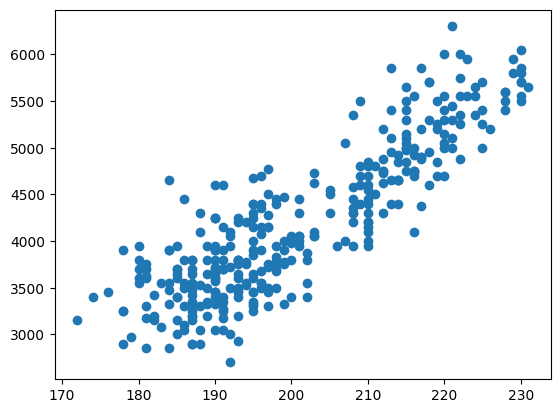

In [33]:
#펭귄데이터 기초 통계량 사용
import pandas as pd
penguins_data = pd.read_csv('penguins.csv')
df.describe()

#펭귄데이터 시각화
plt.scatter(x = penguins_data['flipper_length_mm'], y = penguins_data['body_mass_g'])
plt.show()

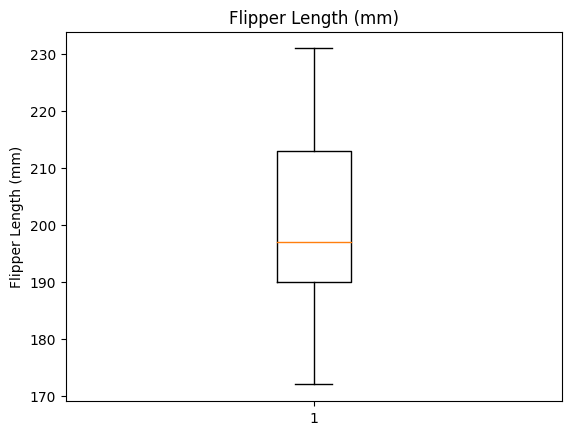

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 펭귄 데이터 로드
penguins = sns.load_dataset('penguins')

# 특정 열에 대한 박스 플롯 그리기
plt.boxplot(penguins['flipper_length_mm'].dropna(), whis=1.5)
plt.title('Flipper Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()
